# Import library

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\OnlineRetail(1).csv", encoding = "ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Mục tiêu: 
    + Chọn mục tiêu Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011. Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011.

In [25]:
df['year'] = df['InvoiceDate'].dt.year

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010


In [33]:
idx = list(df[df['year'] == 2011].index)

In [39]:
len(idx)

499428

In [51]:
df_2011 = df.iloc[idx, [3, 4,8]]

In [52]:
df_2011['Month'] = df_2011['InvoiceDate'].dt.month

In [53]:
df_2011.head()

,Quantity,InvoiceDate,year,Month
42481,10,2011-01-04 10:00:00,2011,1
42482,25,2011-01-04 10:00:00,2011,1
42483,25,2011-01-04 10:00:00,2011,1
42484,5,2011-01-04 10:00:00,2011,1
42485,10,2011-01-04 10:00:00,2011,1


In [54]:
df_2011 = df_2011.groupby('Month').sum()

In [63]:
df_2011 = df_2011.reset_index()

In [64]:
df_2011

,Month,Quantity,year
0,1,308966,70680617
1,2,277989,55718777
2,3,351872,73900228
3,4,289098,60161076
4,5,380391,74467330
5,6,341623,74153614
6,7,391116,79470698
7,8,406199,70956124
8,9,549817,101004486
9,10,570532,122152162


# plot graph quantity by month

Text(0, 0.5, 'Month')

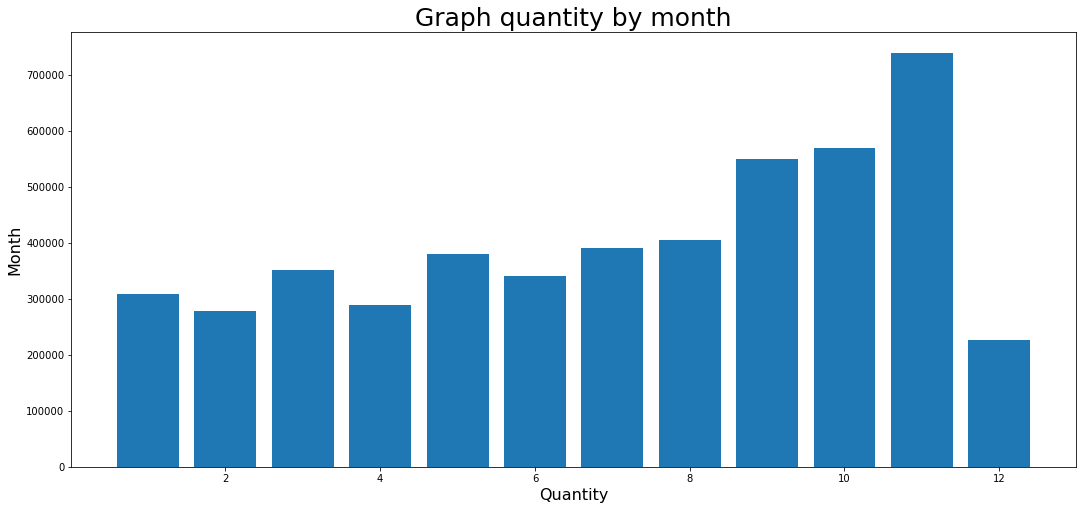

In [69]:
plt.figure(figsize =(18, 8))
plt.title("Graph quantity by month", fontsize = 25)
plt.bar(df_2011['Month'], df_2011['Quantity'])
plt.xlabel("Quantity", fontsize = 16)
plt.ylabel("Month", fontsize = 16)